In [ ]:
!pip install tensorflow==2.12

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# 수집된 온도 정보를 가지고 다음 1시간의 기온 정보를 예측
temp_list = [12.76, 12.48, 13.76, 13.76, 13.76, 14.76,
             14.76, 14.76, 15.2, 15.2, 14.76, 14.76,
             15.2, 15.2, 15.7, 16.0, 16.1, 15.7,
             15.2, 15.2, 15.7, 16.0, 16.1, 15.7,
             15.2, 15.2, 15.7, 16.0, 16.1, 15.7,
            15.2, 15.2, 15.7, 16.0, 16.1, 15.7]

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np

SEQ_LEN = 30 # 이전 몇 개의 데이터를 토대로 유추?
def create_sequence(data, seq_len):
    xs, ys = [] ,[]
    for i in range(len(data)-seq_len):
      x = data[i:i+seq_len]
      y = data[i+seq_len]
      xs.append(x)
      ys.append(y)
    return np.array(xs), np.array(ys)

# 정규화(normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(np.array(temp_list).reshape(-1, 1)).flatten()

X, y = create_sequence(scaled_temp, SEQ_LEN)
X = X.reshape(X.shape[0], X.shape[1],1)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.0339
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 0.9129
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 0.8019
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6993
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.6032
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.5122
Epoch 7/10
1/1 [==============================] - 0s 31ms/step - loss: 0.4256
Epoch 8/10
1/1 [==============================] - 0s 24ms/step - loss: 0.3428
Epoch 9/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2641
Epoch 10/10
1/1 [==============================] - 0s 41ms/step - loss: 0.1902


In [ ]:
predictions = []
current_seq = scaled_temp[-SEQ_LEN:].tolist()

for _ in range(720):  # 1시간(720 * 5초)
    x_input = np.array(current_seq[-SEQ_LEN:]).reshape(1, SEQ_LEN, 1)
    next_val = model.predict(x_input, verbose=0)[0][0]
    predictions.append(next_val)
    current_seq.append(next_val)

# 원래 스케일로 되돌리기
predicted_temps = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

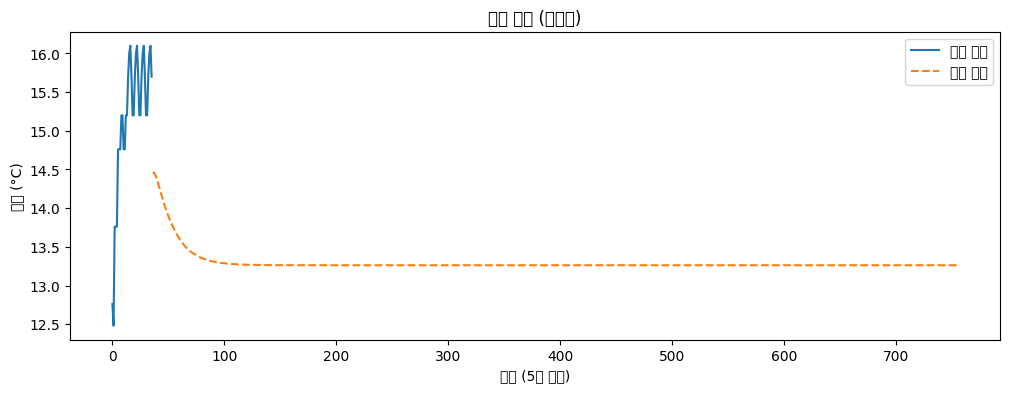

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(range(len(temp_list)), temp_list, label='실제 기온')
plt.plot(range(len(temp_list), len(temp_list)+720), predicted_temps, label='예측 기온', linestyle='--')
plt.legend()
plt.title("기온 예측 (시계열)")
plt.xlabel("시점 (5초 단위)")
plt.ylabel("기온 (°C)")
plt.show()